# Stage 2:
In this task we will analyze New York state compared to the five states California, Texas, Pennsylvania, Florida, and Illinois. These states were chosen by population size which is similar to New York stae. Next we will examine the five counties with the highest cases in the state of New York.

First we import the necessary libraries.

In [122]:
import pandas as pd
import numpy as np
from IPython.display import Image
pd.options.plotting.backend = "plotly"
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


Here we read in the cases, deaths, and population data for the US.

In [123]:
cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
deaths =  pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
population_perCounty = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')


## New York data:
We isolate New York state from the cases, deaths, and population data.

In [124]:
new_york_cases =  cases[cases['State'].map(lambda State: 'NY' in State)]
new_york_cases

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1860,0,Statewide Unallocated,NY,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,25297,25410,25468,25510,25565,25607,25670,25670,25808,25847
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,3592,3597,3598,3605,3611,3618,3620,3620,3622,3627
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,181361,181874,182153,182378,182636,183027,183354,183354,183992,184196
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,18929,18994,19020,19047,19074,19116,19180,19180,19254,19285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,36115,Washington County,NY,36,0,0,0,0,0,0,...,3243,3262,3266,3274,3279,3289,3296,3296,3312,3317
1919,36117,Wayne County,NY,36,0,0,0,0,0,0,...,5909,5932,5944,5952,5965,5976,5997,5997,6023,6042
1920,36119,Westchester County,NY,36,0,0,0,0,0,0,...,132327,132653,132821,132982,133197,133425,133627,133627,134021,134167
1921,36121,Wyoming County,NY,36,0,0,0,0,0,0,...,3633,3637,3638,3639,3641,3644,3648,3648,3651,3652


In [125]:
new_york_deaths =  deaths[deaths['State'].map(lambda State: 'NY' in State)]
new_york_deaths

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1860,0,Statewide Unallocated,NY,36,0,0,0,0,0,0,...,255,255,256,256,257,257,260,260,260,261
1861,36001,Albany County,NY,36,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,358,358
1862,36003,Allegany County,NY,36,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
1863,36005,Bronx County,NY,36,0,0,0,0,0,0,...,6589,6589,6592,6592,6596,6596,6597,6597,6597,6599
1864,36007,Broome County,NY,36,0,0,0,0,0,0,...,367,367,367,367,368,368,369,369,369,369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,36115,Washington County,NY,36,0,0,0,0,0,0,...,55,55,56,56,56,56,56,56,56,56
1919,36117,Wayne County,NY,36,0,0,0,0,0,0,...,73,73,73,73,73,73,73,73,73,73
1920,36119,Westchester County,NY,36,0,0,0,0,0,0,...,2297,2297,2298,2298,2298,2298,2300,2300,2300,2301
1921,36121,Wyoming County,NY,36,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


In [126]:
new_york_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'NY' in State)]
ny_total_pop = new_york_pop['population'].sum() 
ny_total_pop

19453561

We get rid of erronious rows and columns from the cases and deaths data leaving only the cases and deaths numbers.

In [127]:
new_york_deaths = new_york_deaths.drop(new_york_deaths.index[new_york_deaths['countyFIPS'] == 0])
new_york_cases = new_york_cases.drop(new_york_cases.index[new_york_cases['countyFIPS'] == 0])
new_york_cases = new_york_cases.drop(new_york_cases.iloc[:, 0:4], axis=1)
new_york_deaths = new_york_deaths.drop(new_york_deaths.iloc[:, 0:4], axis=1)

In [128]:
new_york_cases

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,25297,25410,25468,25510,25565,25607,25670,25670,25808,25847
1862,0,0,0,0,0,0,0,0,0,0,...,3592,3597,3598,3605,3611,3618,3620,3620,3622,3627
1863,0,0,0,0,0,0,0,0,0,0,...,181361,181874,182153,182378,182636,183027,183354,183354,183992,184196
1864,0,0,0,0,0,0,0,0,0,0,...,18929,18994,19020,19047,19074,19116,19180,19180,19254,19285
1865,0,0,0,0,0,0,0,0,0,0,...,5816,5834,5836,5840,5852,5863,5874,5874,5893,5897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,0,0,...,3243,3262,3266,3274,3279,3289,3296,3296,3312,3317
1919,0,0,0,0,0,0,0,0,0,0,...,5909,5932,5944,5952,5965,5976,5997,5997,6023,6042
1920,0,0,0,0,0,0,0,0,0,0,...,132327,132653,132821,132982,133197,133425,133627,133627,134021,134167
1921,0,0,0,0,0,0,0,0,0,0,...,3633,3637,3638,3639,3641,3644,3648,3648,3651,3652


In [129]:
new_york_deaths

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16
1861,0,0,0,0,0,0,0,0,0,0,...,358,358,358,358,358,358,358,358,358,358
1862,0,0,0,0,0,0,0,0,0,0,...,87,87,87,87,87,87,87,87,87,87
1863,0,0,0,0,0,0,0,0,0,0,...,6589,6589,6592,6592,6596,6596,6597,6597,6597,6599
1864,0,0,0,0,0,0,0,0,0,0,...,367,367,367,367,368,368,369,369,369,369
1865,0,0,0,0,0,0,0,0,0,0,...,93,93,93,93,93,93,94,94,94,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,0,0,...,55,55,56,56,56,56,56,56,56,56
1919,0,0,0,0,0,0,0,0,0,0,...,73,73,73,73,73,73,73,73,73,73
1920,0,0,0,0,0,0,0,0,0,0,...,2297,2297,2298,2298,2298,2298,2300,2300,2300,2301
1921,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53


We iterate through the data subtracting columns from the previous columnn to give us only the new data instead of the total cumulative for both cases and deaths. Next we will group them by periods of 7 days to get our weekly totals.

In [131]:


new_cases = pd.DataFrame()

for column in range(1,573):
  new_cases[column] = new_york_cases.iloc[:,column] - new_york_cases.iloc[:,column-1] 

new_cases

,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1861,0,0,0,0,0,0,0,0,0,0,...,0,113,58,42,55,42,63,0,138,39
1862,0,0,0,0,0,0,0,0,0,0,...,0,5,1,7,6,7,2,0,2,5
1863,0,0,0,0,0,0,0,0,0,0,...,0,513,279,225,258,391,327,0,638,204
1864,0,0,0,0,0,0,0,0,0,0,...,0,65,26,27,27,42,64,0,74,31
1865,0,0,0,0,0,0,0,0,0,0,...,0,18,2,4,12,11,11,0,19,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,0,0,...,0,19,4,8,5,10,7,0,16,5
1919,0,0,0,0,0,0,0,0,0,0,...,0,23,12,8,13,11,21,0,26,19
1920,0,0,0,0,0,0,0,0,0,0,...,0,326,168,161,215,228,202,0,394,146
1921,0,0,0,0,0,0,0,0,0,0,...,0,4,1,1,2,3,4,0,3,1


In [132]:
week_cases = new_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_cases

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
1861,0,0,0,0,0,0,0,23,123,80,...,21,20,14,7,30,61,112,213,354,337
1862,0,0,0,0,0,0,0,2,0,5,...,4,6,1,0,2,7,5,6,23,22
1863,0,0,0,0,0,0,3,93,2232,5486,...,353,224,174,205,416,566,897,1445,1761,1818
1864,0,0,0,0,0,0,0,1,8,29,...,23,15,14,17,17,29,49,86,197,238
1865,0,0,0,0,0,0,0,0,0,6,...,4,3,0,5,2,26,11,41,32,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,3,7,...,12,2,2,3,1,8,12,33,51,43
1919,0,0,0,0,0,0,0,0,6,14,...,18,4,7,6,6,5,21,36,84,90
1920,0,0,0,0,0,1,107,272,3511,6076,...,138,82,103,98,204,321,496,889,1125,1185
1921,0,0,0,0,0,0,0,1,3,5,...,5,3,3,9,6,5,10,13,8,13


In [133]:
new_deaths = pd.DataFrame()

for column in range(1,573):
  new_deaths[column] = new_york_deaths.iloc[:,column] - new_york_deaths.iloc[:,column-1] 

new_deaths

,1,2,3,4,5,6,7,8,9,10,...,563,564,565,566,567,568,569,570,571,572
1861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1862,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,4,0,1,0,0,2
1864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1865,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1919,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1920,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,1
1921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
week_deaths = new_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_deaths

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
1861,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,1,0,0,0,0
1862,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1863,0,0,0,0,0,0,0,1,43,218,...,9,-5,0,3,2,4,4,3,6,7
1864,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,1,0,0,0,0,2
1865,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1919,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,0
1920,0,0,0,0,0,0,0,0,1,24,...,6,0,2,0,0,2,0,1,2,3
1921,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


We take this data and get the mean for all weeks and round to the nearest integer value and store it in a new dataframe for cases and then deaths.

In [135]:
avg_cases = pd.DataFrame

avg_cases= pd.DataFrame(week_cases.mean(axis=0).round())

avg_cases.columns = ['ny_cases_avg']
avg_cases

,ny_cases_avg
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
77,113.0
78,188.0
79,292.0
80,406.0


In [136]:
avg_deaths = pd.DataFrame

avg_deaths = pd.DataFrame(week_deaths.mean(axis=0).round())

avg_deaths.columns = ['ny_deaths_avg']
avg_deaths

,ny_deaths_avg
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
77,1.0
78,1.0
79,1.0
80,1.0


We join the two dataframes together and then get descriptions of the data such as mean, median, mode for both cases and deaths.

In [137]:
merged_ny = avg_cases.join(avg_deaths)
merged_ny

,ny_cases_avg,ny_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,113.0,1.0
78,188.0,1.0
79,292.0,1.0
80,406.0,1.0


In [138]:
merged_ny.mean(axis=0)

ny_cases_avg     431.243902
ny_deaths_avg     10.548780
dtype: float64

In [139]:
merged_ny.mode(axis=0)

,ny_cases_avg,ny_deaths_avg
0,0.0,1.0


In [140]:
merged_ny.median(axis=0)

ny_cases_avg     195.0
ny_deaths_avg      3.5
dtype: float64

In [141]:
merged_ny.describe()

,ny_cases_avg,ny_deaths_avg
count,82.000000,82.00000
mean,431.243902,10.54878
std,460.602037,18.40233
min,0.000000,0.00000
25%,76.000000,1.00000
50%,195.000000,3.50000
75%,784.750000,13.00000
max,1844.000000,110.00000


We repeat the process used on the New York data for the five states being compared.

## California data:

In [142]:
california_cases = cases[cases['State'].map(lambda State: 'CA' in State)]
california_deaths = deaths[deaths['State'].map(lambda State: 'CA' in State)]

california_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'CA' in State)]
ca_total_pop = california_pop['population'].sum()

california_deaths = california_deaths.drop(california_deaths.index[california_deaths['countyFIPS'] == 0])
california_cases = california_cases.drop(california_cases.index[california_cases['countyFIPS'] == 0])
california_cases = california_cases.drop(california_cases.iloc[:, 0:4], axis=1)
california_deaths = california_deaths.drop(california_deaths.iloc[:, 0:4], axis=1)

new_ca_cases = pd.DataFrame()
new_ca_deaths = pd.DataFrame()
for column in range(1,573):
  new_ca_cases[column] = california_cases.iloc[:,column] - california_cases.iloc[:,column-1] 
for column in range(1,573):
  new_ca_deaths[column] = california_deaths.iloc[:,column] - california_deaths.iloc[:,column-1] 

week_ca_cases = new_ca_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_ca_deaths = new_ca_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

ca_avg_cases = pd.DataFrame(week_ca_cases.mean(axis=0).round())
ca_avg_deaths = pd.DataFrame(week_ca_deaths.mean(axis=0).round())
ca_avg_cases.columns = ['ca_avg_cases']
ca_avg_deaths.columns = ['ca_avg_deaths']
merged_ca = ca_avg_cases.join(ca_avg_deaths)

california_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'CA' in State)]
ca_total_pop = california_pop['population'].sum() 

merged_ca.describe()

,ca_avg_cases,ca_avg_deaths
count,82.000000,82.000000
mean,848.000000,13.451220
std,1196.897656,15.787284
min,0.000000,-2.000000
25%,175.500000,5.000000
50%,382.500000,8.000000
75%,1010.750000,14.750000
max,5260.000000,66.000000


In [143]:
merged_ca.median()

ca_avg_cases     382.5
ca_avg_deaths      8.0
dtype: float64

In [144]:
merged_ca.mode()

,ca_avg_cases,ca_avg_deaths
0,0.0,0.0


## Texas data:

In [145]:
texas_cases = cases[cases['State'].map(lambda State: 'TX' in State)]
texas_deaths = deaths[deaths['State'].map(lambda State: 'TX' in State)]

texas_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'TX' in State)]
tx_total_pop = texas_pop['population'].sum() 

texas_deaths = texas_deaths.drop(texas_deaths.index[texas_deaths['countyFIPS'] == 0])
texas_cases = texas_cases.drop(texas_cases.index[texas_cases['countyFIPS'] == 0])
texas_cases = texas_cases.drop(texas_cases.iloc[:, 0:4], axis=1)
texas_deaths = texas_deaths.drop(texas_deaths.iloc[:, 0:4], axis=1)

new_tx_cases = pd.DataFrame()
new_tx_deaths = pd.DataFrame()
for column in range(1,573):
  new_tx_cases[column] = texas_cases.iloc[:,column] - texas_cases.iloc[:,column-1] 
for column in range(1,573):
  new_tx_deaths[column] = texas_deaths.iloc[:,column] - texas_deaths.iloc[:,column-1]

week_tx_cases = new_tx_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_tx_deaths = new_tx_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

tx_avg_cases = pd.DataFrame(week_tx_cases.mean(axis=0).round())
tx_avg_deaths = pd.DataFrame(week_tx_deaths.mean(axis=0).round())
tx_avg_cases.columns = ['tx_avg_cases']
tx_avg_deaths.columns = ['tx_avg_deaths']
merged_tx = tx_avg_cases.join(tx_avg_deaths)

texas_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'TX' in State)]
tx_total_pop = texas_pop['population'].sum()

merged_tx.describe()

,tx_avg_cases,tx_avg_deaths
count,82.000000,82.000000
mean,159.841463,2.573171
std,171.242264,2.403857
min,0.000000,0.000000
25%,35.250000,1.000000
50%,107.000000,2.000000
75%,215.000000,4.000000
max,955.000000,9.000000


In [146]:
merged_tx.median()

tx_avg_cases     107.0
tx_avg_deaths      2.0
dtype: float64

In [147]:
merged_tx.mode()

,tx_avg_cases,tx_avg_deaths
0,0.0,1.0


## Pennsylvania data:

In [148]:
pennsylvania_cases = cases[cases['State'].map(lambda State: 'PA' in State)]
pennsylvania_deaths = deaths[deaths['State'].map(lambda State: 'PA' in State)]

pennsylvania_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'PA' in State)]
pa_total_pop = pennsylvania_pop['population'].sum()

pennsylvania_deaths = pennsylvania_deaths.drop(pennsylvania_deaths.index[pennsylvania_deaths['countyFIPS'] == 0])
pennsylvania_cases = pennsylvania_cases.drop(pennsylvania_cases.index[pennsylvania_cases['countyFIPS'] == 0])
pennsylvania_cases = pennsylvania_cases.drop(pennsylvania_cases.iloc[:, 0:4], axis=1)
pennsylvania_deaths = pennsylvania_deaths.drop(pennsylvania_deaths.iloc[:, 0:4], axis=1)

new_pa_cases = pd.DataFrame()
new_pa_deaths = pd.DataFrame()
for column in range(1,573):
  new_pa_cases[column] = pennsylvania_cases.iloc[:,column] - pennsylvania_cases.iloc[:,column-1] 
for column in range(1,573):
  new_pa_deaths[column] = pennsylvania_deaths.iloc[:,column] - pennsylvania_deaths.iloc[:,column-1]

week_pa_cases = new_pa_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_pa_deaths = new_pa_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

pa_avg_cases = pd.DataFrame(week_pa_cases.mean(axis=0).round())
pa_avg_deaths = pd.DataFrame(week_pa_deaths.mean(axis=0).round())
pa_avg_cases.columns = ['pa_avg_cases']
pa_avg_deaths.columns = ['pa_avg_deaths']
merged_pa = pa_avg_cases.join(pa_avg_deaths)

pennsylvania_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'PA' in State)]
pa_total_pop = pennsylvania_pop['population'].sum()

merged_pa.describe()

,pa_avg_cases,pa_avg_deaths
count,82.000000,82.000000
mean,227.902439,5.109756
std,260.951895,5.985592
min,0.000000,0.000000
25%,61.000000,1.000000
50%,110.000000,3.000000
75%,328.250000,6.500000
max,1092.000000,23.000000


In [149]:
merged_pa.median()

pa_avg_cases     110.0
pa_avg_deaths      3.0
dtype: float64

In [150]:
merged_pa.mode()

,pa_avg_cases,pa_avg_deaths
0,0.0,2.0


## Florida data:

In [151]:
florida_cases = cases[cases['State'].map(lambda State: 'FL' in State)]
florida_deaths = deaths[deaths['State'].map(lambda State: 'FL' in State)]

florida_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'FL' in State)]
fl_total_pop = florida_pop['population'].sum()

florida_deaths = florida_deaths.drop(florida_deaths.index[florida_deaths['countyFIPS'] == 0])
florida_cases = florida_cases.drop(florida_cases.index[florida_cases['countyFIPS'] == 0])
florida_cases = florida_cases.drop(florida_cases.iloc[:, 0:4], axis=1)
florida_deaths = florida_deaths.drop(florida_deaths.iloc[:, 0:4], axis=1)

new_fl_cases = pd.DataFrame()
new_fl_deaths = pd.DataFrame()
for column in range(1,573):
  new_fl_cases[column] = florida_cases.iloc[:,column] - florida_cases.iloc[:,column-1] 
for column in range(1,573):
  new_fl_deaths[column] = florida_deaths.iloc[:,column] - florida_deaths.iloc[:,column-1] 

week_fl_cases = new_fl_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_fl_deaths = new_fl_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

fl_avg_cases = pd.DataFrame(week_fl_cases.mean(axis=0).round())
fl_avg_deaths = pd.DataFrame(week_fl_deaths.mean(axis=0).round())
fl_avg_cases.columns = ['fl_avg_cases']
fl_avg_deaths.columns = ['fl_avg_deaths']
merged_fl = fl_avg_cases.join(fl_avg_deaths)

florida_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'FL' in State)]
fl_total_pop = florida_pop['population'].sum()

merged_fl.describe()

,fl_avg_cases,fl_avg_deaths
count,82.000000,82.000000
mean,523.695122,6.743902
std,517.084220,5.662986
min,-390.000000,0.000000
25%,107.000000,2.250000
50%,383.000000,6.000000
75%,776.500000,11.000000
max,2265.000000,19.000000


In [152]:
merged_fl.median()

fl_avg_cases     383.0
fl_avg_deaths      6.0
dtype: float64

In [153]:
merged_fl.mode()

,fl_avg_cases,fl_avg_deaths
0,0.0,0.0


## Illinois data:

In [154]:
illinois_cases = cases[cases['State'].map(lambda State: 'IL' in State)]
illinois_deaths = deaths[deaths['State'].map(lambda State: 'IL' in State)]

illinois_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'IL' in State)]
il_total_pop = illinois_pop['population'].sum()

illinois_deaths = illinois_deaths.drop(illinois_deaths.index[illinois_deaths['countyFIPS'] == 0])
illinois_cases = illinois_cases.drop(illinois_cases.index[illinois_cases['countyFIPS'] == 0])
illinois_cases = illinois_cases.drop(illinois_cases.iloc[:, 0:4], axis=1)
illinois_deaths = illinois_deaths.drop(illinois_deaths.iloc[:, 0:4], axis=1)

new_il_cases = pd.DataFrame()
new_il_deaths = pd.DataFrame()
for column in range(1,573):
  new_il_cases[column] = illinois_cases.iloc[:,column] - illinois_cases.iloc[:,column-1] 
for column in range(1,573):
  new_il_deaths[column] = illinois_deaths.iloc[:,column] - illinois_deaths.iloc[:,column-1]

week_il_cases = new_il_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
week_il_deaths = new_il_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()

il_avg_cases = pd.DataFrame(week_il_cases.mean(axis=0).round())
il_avg_deaths = pd.DataFrame(week_il_deaths.mean(axis=0).round())
il_avg_cases.columns = ['il_avg_cases']
il_avg_deaths.columns = ['il_avg_deaths']
merged_il = il_avg_cases.join(il_avg_deaths)

illinois_pop = population_perCounty[population_perCounty['State'].map(lambda State: 'IL' in State)]
il_total_pop = illinois_pop['population'].sum()

merged_il.describe()

,il_avg_cases,il_avg_deaths
count,82.000000,82.000000
mean,175.378049,3.158537
std,187.632925,3.497687
min,0.000000,0.000000
25%,54.000000,1.000000
50%,124.500000,2.000000
75%,192.000000,4.750000
max,847.000000,23.000000


In [155]:
merged_il.median()

il_avg_cases     124.5
il_avg_deaths      2.0
dtype: float64

In [156]:
merged_il.mode()

,il_avg_cases,il_avg_deaths
0,0.0,1.0


## Normalization:
We use the population data and a factor of 10,000 to normalize the states. 

In [157]:
merged_cities_cases = pd.DataFrame()
merged_cities_deaths = pd.DataFrame()

merged_cities_cases['ny_cases_avg'] = merged_ny['ny_cases_avg'].apply(lambda x: x/ny_total_pop * 10000)
merged_cities_deaths['ny_deaths_avg'] = merged_ny['ny_deaths_avg'].apply(lambda x: x/ny_total_pop * 10000)

merged_cities_cases['ca_avg_cases'] = merged_ca['ca_avg_cases'].apply(lambda x: x/ca_total_pop * 10000)
merged_cities_deaths['ca_avg_deaths'] = merged_ca['ca_avg_deaths'].apply(lambda x: x/ca_total_pop * 10000)

merged_cities_cases['tx_avg_cases'] = merged_tx['tx_avg_cases'].apply(lambda x: x/tx_total_pop * 10000)
merged_cities_deaths['tx_avg_deaths'] = merged_tx['tx_avg_deaths'].apply(lambda x: x/tx_total_pop * 10000)

merged_cities_cases['pa_avg_cases'] = merged_pa['pa_avg_cases'].apply(lambda x: x/pa_total_pop * 10000)
merged_cities_deaths['pa_avg_deaths'] = merged_pa['pa_avg_deaths'].apply(lambda x: x/pa_total_pop * 10000)

merged_cities_cases['fl_avg_cases'] = merged_fl['fl_avg_cases'].apply(lambda x: x/fl_total_pop * 10000)
merged_cities_deaths['fl_avg_deaths'] = merged_fl['fl_avg_deaths'].apply(lambda x: x/fl_total_pop * 10000)

merged_cities_cases['il_avg_cases'] = merged_il['il_avg_cases'].apply(lambda x: x/il_total_pop * 10000)
merged_cities_deaths['il_avg_deaths'] = merged_il['il_avg_deaths'].apply(lambda x: x/il_total_pop * 10000)

## Graphs:
We plot the five states against each other, first using cases and second using deaths.

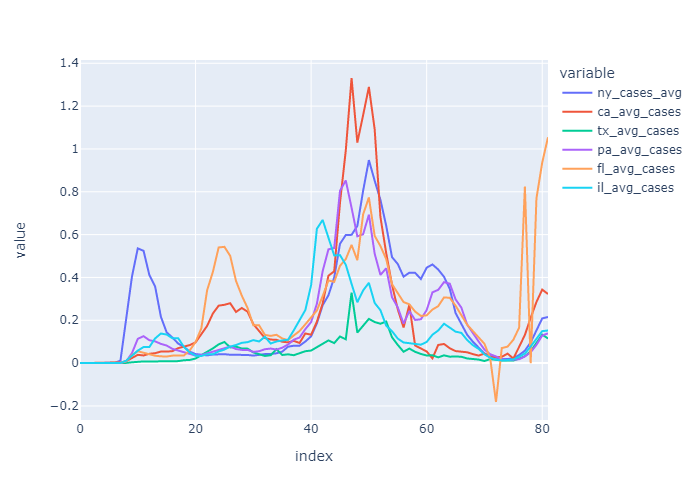

In [158]:
merged_cities_cases_plot = merged_cities_cases.plot(kind='line')
merged_cities_cases_plot = merged_cities_cases_plot.to_image(format='png')
Image(merged_cities_cases_plot)

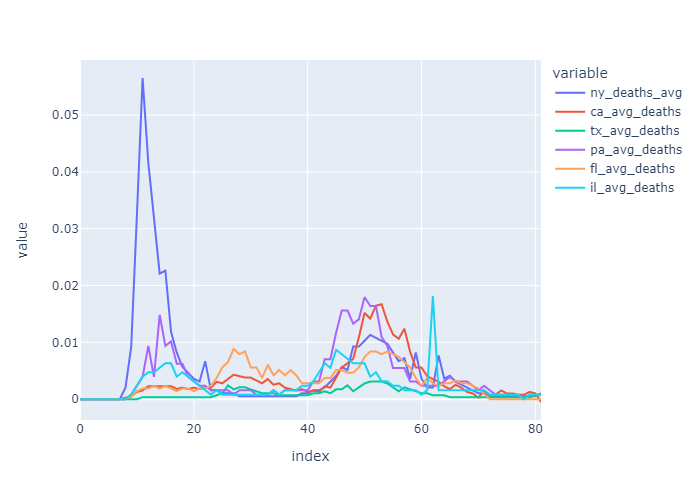

In [159]:
merged_cities_deaths_plot = merged_cities_deaths.plot(kind='line')
merged_cities_deaths_plot = merged_cities_deaths_plot.to_image(format='png')
Image(merged_cities_deaths_plot)

## US vs states analysis:
The graphs for the five states transposed upong each other provide an almost mirror image for the US graph and this is mainly due to the fact that the five states chosen are the five highest populace states in the country which should be fairly indicative of national trends. In the early portion of the graph New York has large spikes which are likely due to the state being a large entry point into the country and the highly concentrated city population which both contribute to spread. Nearing the end of the graph New York is much lower than other states and this is likely due to aggressive efforts to curb the spread of COVID such as vaccine passports. In week 41 California sees a significant spike and this is likely a conjunction between factors such as the lack of a vaccine and december holidays and gatherings leading up to them. Thw end of the graph also has a spike near the end for Florida which may be the result of political pushback against efforts to control the spread of COVID.

## County analysis:
We gather the top counties five by number of cases.

In [160]:
ny_weeks_names = cases.drop(cases.index[cases['countyFIPS'] == 0])
ny_weeks_names = ny_weeks_names[ny_weeks_names['State'].map(lambda State: 'NY' in State)]
ny_weeks_names = ny_weeks_names.iloc[:,:2]

ny_weeks_cases = week_cases.sum(axis = 1)

ny_top_cases = pd.concat([ny_weeks_names,ny_weeks_cases], axis=1)
ny_top_cases = ny_top_cases.sort_values(by=[0],ascending = False).head(5)
ny_top_cases

,countyFIPS,County Name,0
1884,36047,Kings County,292211
1901,36081,Queens County,284764
1912,36103,Suffolk County,209612
1890,36059,Nassau County,192601
1863,36005,Bronx County,184196


We isolate King county from the cases and deaths data and prepare the data for graphing.
## King county

In [161]:
kings_cases = cases.drop(cases.index[cases['countyFIPS']!= 36047])
kings_cases = kings_cases.drop(kings_cases.iloc[:, 0:4], axis=1)
new_kings_cases = pd.DataFrame()
for column in range(1,573):
  new_kings_cases[column] = kings_cases.iloc[:,column] - kings_cases.iloc[:,column-1]
kings_week_cases = new_kings_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_kings_cases = pd.DataFrame(kings_week_cases.mean(axis=0).round())
avg_kings_cases.columns = ['kings_cases_avg']

kings_deaths = deaths.drop(deaths.index[cases['countyFIPS']!= 36047])
kings_deaths = kings_deaths.drop(kings_deaths.iloc[:, 0:4], axis=1)
new_kings_deaths = pd.DataFrame()
for column in range(1,573):
  new_kings_deaths[column] = kings_deaths.iloc[:,column] - kings_deaths.iloc[:,column-1]
kings_week_deaths = new_kings_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_kings_deaths = pd.DataFrame(kings_week_deaths.mean(axis=0).round())
avg_kings_deaths.columns = ['kings_deaths_avg']

kings_merged = avg_kings_cases.join(avg_kings_deaths)

kings_merged_log = pd.DataFrame()
kings_merged_log['kings_log_cases'] = np.log(kings_merged['kings_cases_avg'])
kings_merged_log['kings_log_deaths'] = np.log(kings_merged['kings_deaths_avg'])

kings_merged

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



,kings_cases_avg,kings_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,1401.0,8.0
78,2205.0,5.0
79,3147.0,9.0
80,4051.0,11.0


## Queens county

In [162]:
queens_cases = cases.drop(cases.index[cases['countyFIPS']!= 36081])
queens_cases = queens_cases.drop(queens_cases.iloc[:, 0:4], axis=1)
new_queens_cases = pd.DataFrame()
for column in range(1,573):
  new_queens_cases[column] = queens_cases.iloc[:,column] - queens_cases.iloc[:,column-1]
queens_week_cases = new_queens_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_queens_cases = pd.DataFrame(queens_week_cases.mean(axis=0).round())
avg_queens_cases.columns = ['queens_cases_avg']

queens_deaths = deaths.drop(deaths.index[deaths['countyFIPS']!= 36081])
queens_deaths = queens_deaths.drop(queens_deaths.iloc[:, 0:4], axis=1)
new_queens_deaths = pd.DataFrame()
for column in range(1,573):
  new_queens_deaths[column] = queens_deaths.iloc[:,column] - queens_deaths.iloc[:,column-1]
queens_week_deaths = new_queens_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_queens_deaths = pd.DataFrame(queens_week_deaths.mean(axis=0).round())
avg_queens_deaths.columns = ['queens_deaths_avg']

queens_merged = avg_queens_cases.join(avg_queens_deaths)

queens_merged_log = pd.DataFrame()
queens_merged_log['queens_log_cases'] = np.log(queens_merged['queens_cases_avg'])
queens_merged_log['queens_log_deaths'] = np.log(queens_merged['queens_deaths_avg'])

queens_merged

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



,queens_cases_avg,queens_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,926.0,8.0
78,1497.0,16.0
79,2293.0,6.0
80,3106.0,5.0


## Suffolk county

In [163]:
suffolk_cases = cases.drop(cases.index[cases['countyFIPS']!= 36103])
suffolk_cases = suffolk_cases.drop(suffolk_cases.iloc[:, 0:4], axis=1)
new_suffolk_cases = pd.DataFrame()
for column in range(1,573):
  new_suffolk_cases[column] = suffolk_cases.iloc[:,column] - suffolk_cases.iloc[:,column-1]
suffolk_week_cases = new_suffolk_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_suffolk_cases = pd.DataFrame(suffolk_week_cases.mean(axis=0).round())
avg_suffolk_cases.columns = ['suffolk_cases_avg']

suffolk_deaths = deaths.drop(deaths.index[deaths['countyFIPS']!= 36103])
suffolk_deaths = suffolk_deaths.drop(suffolk_deaths.iloc[:, 0:4], axis=1)
new_suffolk_deaths = pd.DataFrame()
for column in range(1,573):
  new_suffolk_deaths[column] = suffolk_deaths.iloc[:,column] - suffolk_deaths.iloc[:,column-1]
suffolk_week_deaths = new_suffolk_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_suffolk_deaths = pd.DataFrame(suffolk_week_deaths.mean(axis=0).round())
avg_suffolk_deaths.columns = ['suffolk_deaths_avg']

suffolk_merged = avg_suffolk_cases.join(avg_suffolk_deaths)

suffolk_merged_log = pd.DataFrame()
suffolk_merged_log['suffolk_log_cases'] = np.log(suffolk_merged['suffolk_cases_avg'])
suffolk_merged_log['suffolk_log_deaths'] = np.log(suffolk_merged['suffolk_deaths_avg'])

suffolk_merged

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



,suffolk_cases_avg,suffolk_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,556.0,1.0
78,987.0,2.0
79,1649.0,4.0
80,2209.0,5.0


## Nassau county

In [164]:
nassau_cases = cases.drop(cases.index[cases['countyFIPS']!= 36059])
nassau_cases = nassau_cases.drop(nassau_cases.iloc[:, 0:4], axis=1)
new_nassau_cases = pd.DataFrame()
for column in range(1,573):
  new_nassau_cases[column] = nassau_cases.iloc[:,column] - nassau_cases.iloc[:,column-1]
nassau_week_cases = new_nassau_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_nassau_cases = pd.DataFrame(nassau_week_cases.mean(axis=0).round())
avg_nassau_cases.columns = ['nassau_cases_avg']

nassau_deaths = deaths.drop(deaths.index[deaths['countyFIPS']!= 36059])
nassau_deaths = nassau_deaths.drop(nassau_deaths.iloc[:, 0:4], axis=1)
new_nassau_deaths = pd.DataFrame()
for column in range(1,573):
  new_nassau_deaths[column] = nassau_deaths.iloc[:,column] - nassau_deaths.iloc[:,column-1]
nassau_week_deaths = new_nassau_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_nassau_deaths = pd.DataFrame(nassau_week_deaths.mean(axis=0).round())
avg_nassau_deaths.columns = ['nassau_deaths_avg']

nassau_merged = avg_nassau_cases.join(avg_nassau_deaths)

nassau_merged_log = pd.DataFrame()
nassau_merged_log['nassau_log_cases'] = np.log(nassau_merged['nassau_cases_avg'])
nassau_merged_log['nassau_log_deaths'] = np.log(nassau_merged['nassau_deaths_avg'])

nassau_merged


C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



,nassau_cases_avg,nassau_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,655.0,1.0
78,1136.0,2.0
79,1679.0,2.0
80,2256.0,3.0


## Bronx county

In [165]:
bronx_cases = cases.drop(cases.index[cases['countyFIPS']!= 36005])
bronx_cases = bronx_cases.drop(bronx_cases.iloc[:, 0:4], axis=1)
new_bronx_cases = pd.DataFrame()
for column in range(1,573):
  new_bronx_cases[column] = bronx_cases.iloc[:,column] - bronx_cases.iloc[:,column-1]
bronx_week_cases = new_bronx_cases.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_bronx_cases = pd.DataFrame(bronx_week_cases.mean(axis=0).round())
avg_bronx_cases.columns = ['bronx_cases_avg']

bronx_deaths = deaths.drop(deaths.index[deaths['countyFIPS']!= 36005])
bronx_deaths = bronx_deaths.drop(bronx_deaths.iloc[:, 0:4], axis=1)
new_bronx_deaths = pd.DataFrame()
for column in range(1,573):
  new_bronx_deaths[column] = bronx_deaths.iloc[:,column] - bronx_deaths.iloc[:,column-1]
bronx_week_deaths = new_bronx_deaths.groupby([[i//7 for i in range(1, 573)]], axis = 1).sum()
avg_bronx_deaths = pd.DataFrame(bronx_week_deaths.mean(axis=0).round())
avg_bronx_deaths.columns = ['bronx_deaths_avg']

bronx_merged = avg_bronx_cases.join(avg_bronx_deaths)

bronx_merged_log = pd.DataFrame()
bronx_merged_log['bronx_log_cases'] = np.log(bronx_merged['bronx_cases_avg'])
bronx_merged_log['bronx_log_deaths'] = np.log(bronx_merged['bronx_deaths_avg'])

bronx_merged

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\lww11\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

invalid value encountered in log



,bronx_cases_avg,bronx_deaths_avg
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
77,566.0,4.0
78,897.0,4.0
79,1445.0,3.0
80,1761.0,6.0


## County Graphs:
### Kings

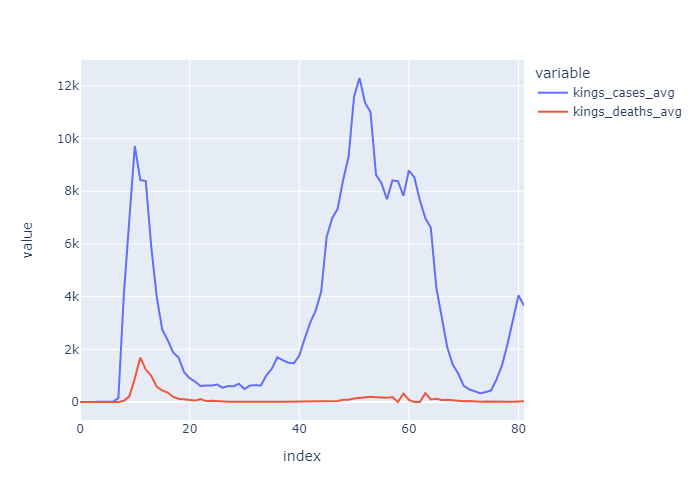

In [166]:
kings_plot = kings_merged.plot(kind='line')
kings_plot = kings_plot.to_image(format='png')

Image(kings_plot)

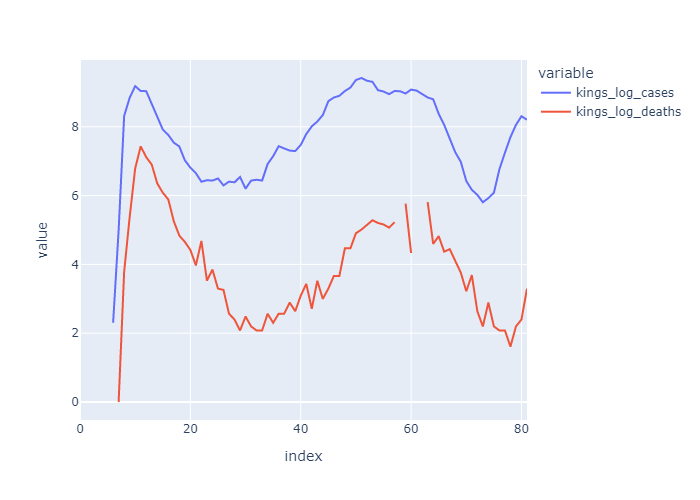

In [167]:
kings_plot_log = kings_merged_log.plot(kind='line')
kings_plot_log = kings_plot_log.to_image(format='png')

Image(kings_plot_log)

### Queens

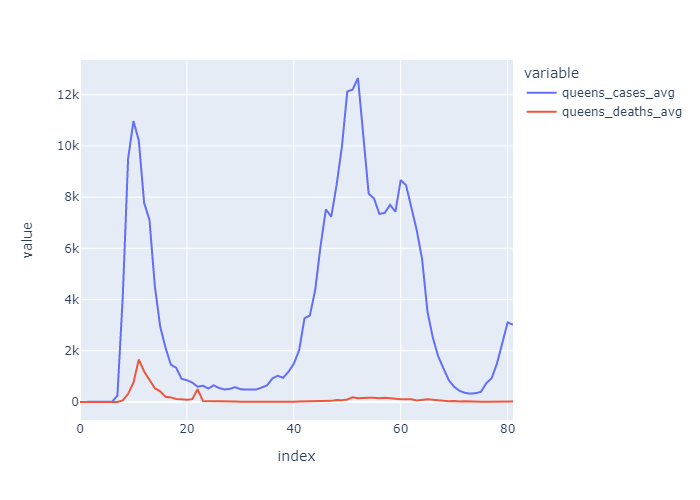

In [168]:
queens_plot = queens_merged.plot(kind='line')
queens_plot = queens_plot.to_image(format='png')

Image(queens_plot)

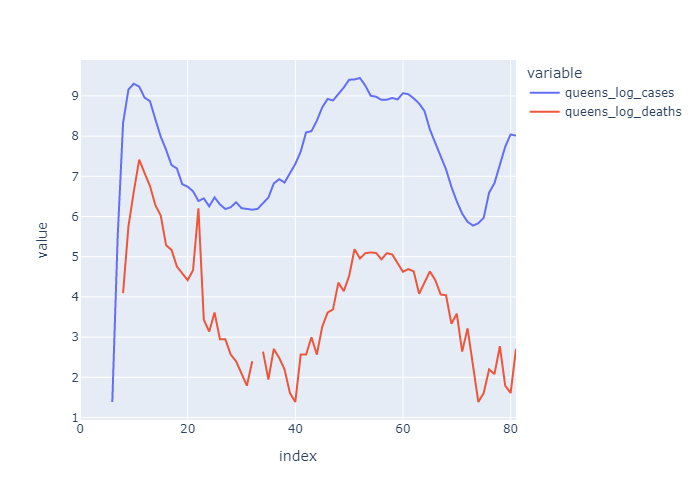

In [169]:
queens_plot_log = queens_merged_log.plot(kind='line')
queens_plot_log = queens_plot_log.to_image(format='png')

Image(queens_plot_log)

### Suffolk

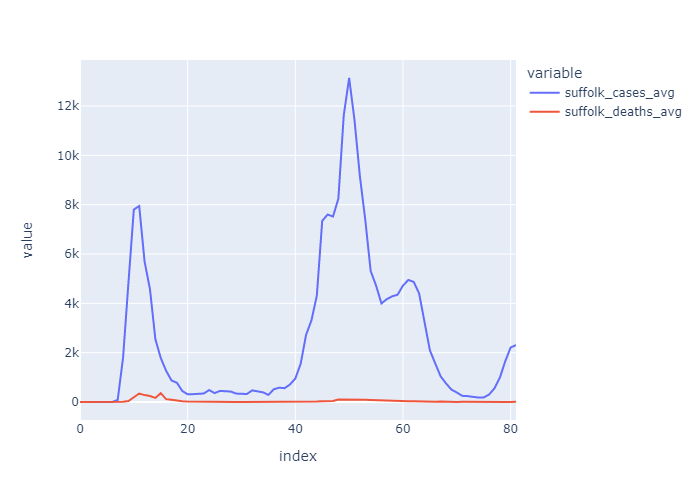

In [170]:
suffolk_plot = suffolk_merged.plot(kind='line')
suffolk_plot = suffolk_plot.to_image(format='png')

Image(suffolk_plot)

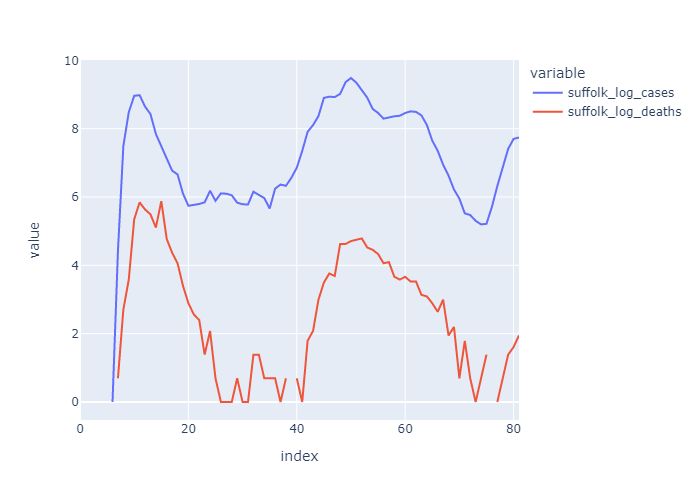

In [171]:
suffolk_plot_log = suffolk_merged_log.plot(kind='line')
suffolk_plot_log = suffolk_plot_log.to_image(format='png')

Image(suffolk_plot_log)

### Nassau

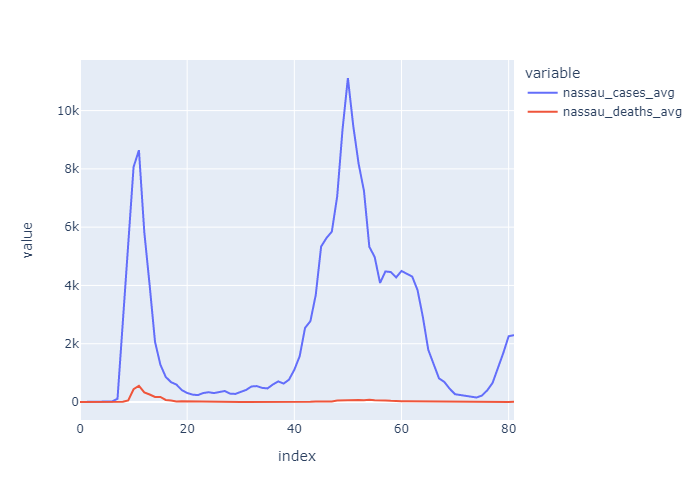

In [172]:
nassau_plot = nassau_merged.plot(kind='line')
nassau_plot = nassau_plot.to_image(format='png')

Image(nassau_plot)

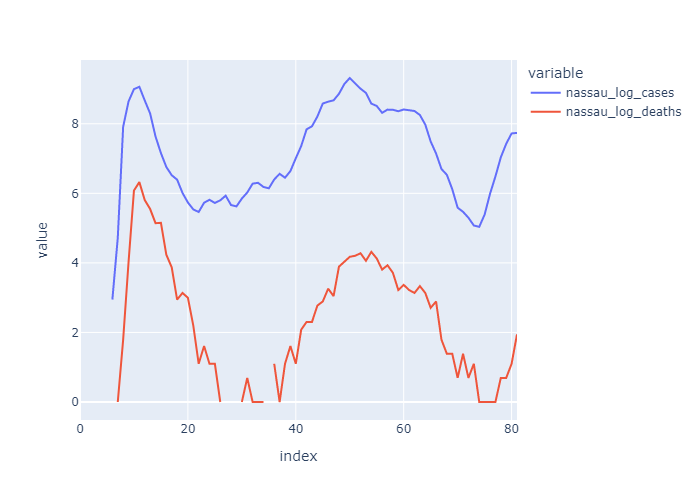

In [173]:
nassau_plot_log = nassau_merged_log.plot(kind='line')
nassau_plot_log = nassau_plot_log.to_image(format='png')

Image(nassau_plot_log)

### Bronx

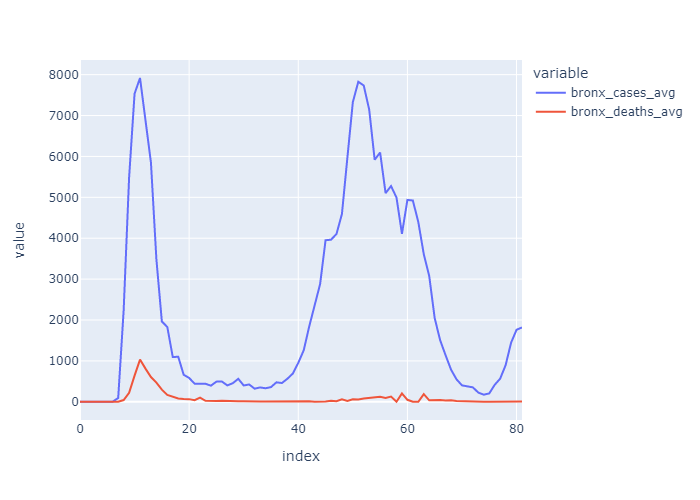

In [174]:
bronx_plot = bronx_merged.plot(kind='line')
bronx_plot = bronx_plot.to_image(format='png')

Image(bronx_plot)

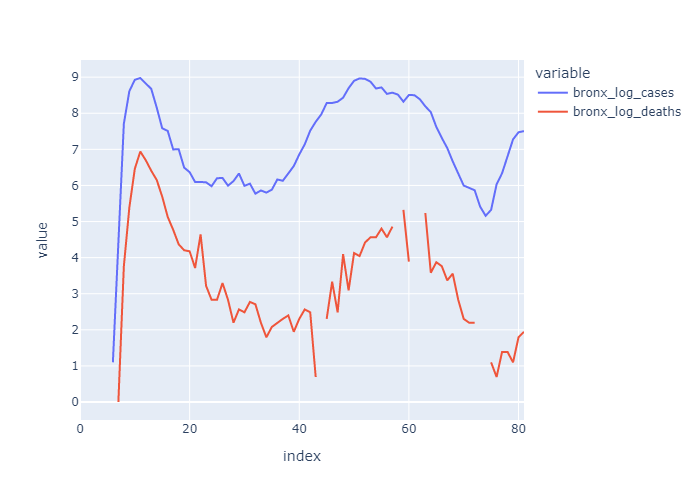

In [175]:
bronx_plot_log = bronx_merged_log.plot(kind='line')
bronx_plot_log = bronx_plot_log.to_image(format='png')

Image(bronx_plot_log)

## County Analysis:
All of the counties have very similar graphs. They are all very similar to the states graph but do differ in the middle from December 2020 until March 2021 where these counties all have higher spikes, this is likely due to the rest of the state having sparser populations and thus an overall lower spike during this time period. The counties of Kings, Queens, and the Bronx are nearly identical which can be noted by a shallow valley from mid January 2021 until early March which is a more pronounced dip in Suffolk and Nassau counties. I believe this occurs due to the closeness of the first three counties to each other where Bronx, Kings, and Queens are in the heart of New York City which is the states capital. The counties of Nassau and Suffolk are still close but they reside closer to the outskirts toward the the ocean. After the March date there is significant drop off of cases which coincides with the first large scale availability of vaccines for the public. The end of the graphs all have small upticks in cases which can likely be attributed to the omicron variants resistance to vaccines and the weigning efficacy of the vaccines due to time since reception.